<a href="https://colab.research.google.com/github/Ishank2301/Comprehensive-ML-Handbook/blob/main/fashion_mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, regularizers
from tensorflow.keras.utils import to_categorical


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2026-02-19 06:35:39.408795: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1771482939.603959      23 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1771482939.659033      23 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1771482940.104965      23 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771482940.105011      23 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771482940.105015      23 computation_placer.cc:177] computation placer alr

/kaggle/input/datasets/organizations/zalando-research/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/datasets/organizations/zalando-research/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/datasets/organizations/zalando-research/fashionmnist/fashion-mnist_test.csv
/kaggle/input/datasets/organizations/zalando-research/fashionmnist/fashion-mnist_train.csv
/kaggle/input/datasets/organizations/zalando-research/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/datasets/organizations/zalando-research/fashionmnist/train-images-idx3-ubyte


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zalando-research/fashionmnist")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/datasets/organizations/zalando-research/fashionmnist


In [ ]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
y_train.shape, y_test.shape

((60000,), (10000,))

# Visualizing Images:

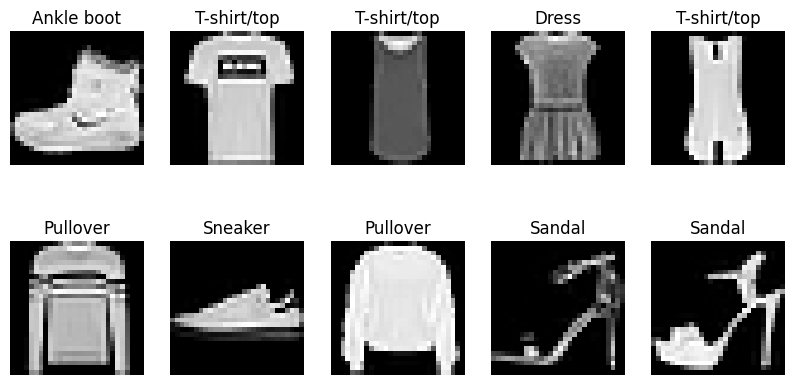

In [ ]:
label_names = ['T-shirt/top', 'Trouser', 'Pullover','Dress','Coat',
              'Sandal','Shirt','Sneaker','Bag','Ankle boot']

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(label_names[y_train[i]])
    plt.axis('off')
plt.show()

# Normalizing Image Size and Frame Size:

In [ ]:
# Convert the image pixels to 0 and 1 for convolution as filter works propely on them white and black pixels:
X_train,X_test = X_train/255.0, X_test/255.0

# Reshaping the frame size:
X_train, X_test = X_train.reshape(-1,28,28,1), X_test.reshape(-1,28,28,1)




# Building A CNN Model:


In [ ]:
model = Sequential()

model.add(Conv2D(32,(3,3), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(10, activation="softmax"))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1771482968.896482      23 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15511 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 250,058 (976.79 KB)

 Trainable params: 249,610 (975.04 KB)

 Non-trainable params: 448 (1.75 KB)

**EarlyStopping For Computational Efficiency**

In [ ]:
callback = EarlyStopping(monitor='val_loss',
                        min_delta=0.00001,
                        patience=5,
                        verbose=1,
                        mode="auto",
                        baseline=None,
                        restore_best_weights=True)

# Compile and Train the Model:

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",metrics=["accuracy"],optimizer='adam')



In [ ]:
y_test.shape

(10000,)

In [ ]:
history = model.fit(X_train, y_train,epochs=20, validation_data=(X_test,y_test),callbacks=callback,verbose=1)


Epoch 1/20


I0000 00:00:1771482974.116334      64 service.cc:152] XLA service 0x7f7c24004120 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1771482974.116397      64 service.cc:160]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1771482974.726577      64 cuda_dnn.cc:529] Loaded cuDNN version 91002


  44/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3492 - loss: 1.9941

I0000 00:00:1771482978.896618      64 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.7473 - loss: 0.7340 - val_accuracy: 0.8704 - val_loss: 0.3473
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8836 - loss: 0.3374 - val_accuracy: 0.8518 - val_loss: 0.3680
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9005 - loss: 0.2888 - val_accuracy: 0.8959 - val_loss: 0.2829
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9123 - loss: 0.2480 - val_accuracy: 0.9053 - val_loss: 0.2680
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9205 - loss: 0.2293 - val_accuracy: 0.9015 - val_loss: 0.2904
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9244 - loss: 0.2104 - val_accuracy: 0.8930 - val_loss: 0.3272
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9327 - loss: 0.1890 - val_accuracy: 0.9188 - val_loss: 0.2440
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9340 - loss: 0.1871 - val_accura

# Observing the Training Results:

Text(0.5, 1.0, 'Training_accuracy')

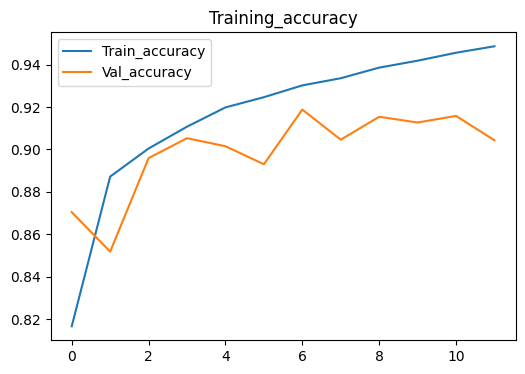

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train_accuracy')
plt.plot(history.history['val_accuracy'], label='Val_accuracy')
plt.legend()
plt.title('Training_accuracy')



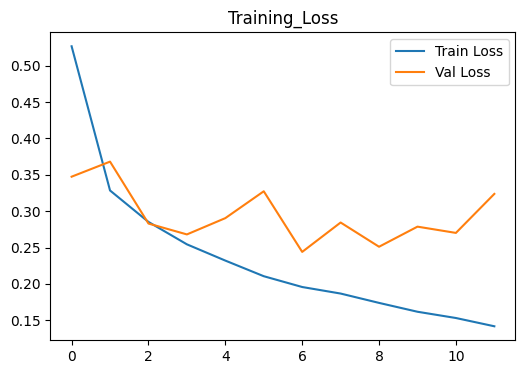

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Training_Loss')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9203 - loss: 0.2597
Test Accuracy: 0.92


# Visualizing the Test Results:

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


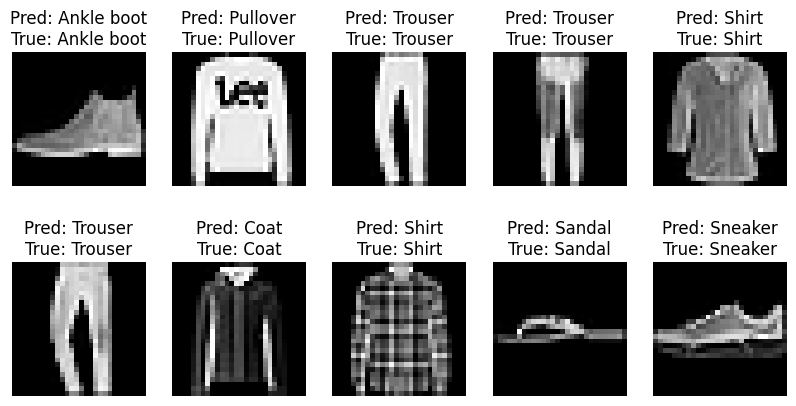

In [ ]:
pred = model.predict(X_test)
pred_labels = np.argmax(pred, axis=1)
true_labels = y_test

label_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {label_names[pred_labels[i]]}\nTrue: {label_names[true_labels[i]]}")
    plt.axis('off')
plt.show()

**I think our model might have a little hallucination in it but it can be resolved using data augmentation and our overall accuracy is very good.**